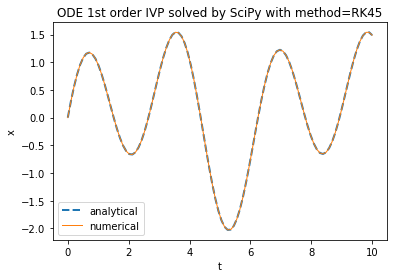

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

ode_fn = lambda t, x: np.sin(t) + 3. * np.cos(2. * t) - x

an_sol = lambda t : (1./2.) * np.sin(t) - (1./2.) * np.cos(t) + \
                    (3./5.) * np.cos(2.*t) + (6./5.) * np.sin(2.*t) - \
                    (1./10.) * np.exp(-t)
t_begin=0.
t_end=10.
t_nsamples=100
t_space = np.linspace(t_begin, t_end, t_nsamples)
x_init = 0.

x_an_sol = an_sol(t_space)

method = 'RK45' #available methods: 'RK45', 'RK23', 'DOP853', 'Radau', 'BDF', 'LSODA'
num_sol = solve_ivp(ode_fn, [t_begin, t_end], [x_init], method=method, dense_output=True)
x_num_sol = num_sol.sol(t_space).T

plt.figure()
plt.plot(t_space, x_an_sol, '--', linewidth=2, label='analytical')
plt.plot(t_space, x_num_sol, linewidth=1, label='numerical')
plt.title('ODE 1st order IVP solved by SciPy with method=' + method)
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()